In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import sys
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [15]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rc('text', usetex=True)

ALPHA=0.3
FIGSIZE=[12,12]
DPI=300

snap_no = 7

In [16]:
outpath = '../../plots/plots_L3N256_variation/'

CDM_runs = [ f'run_CDM_L3N256_HY_dir_{i}' for i in range(10) ] + ['run_CDM_L3N256_HY']

tcDM_runs1 = [ f'run_2cDM_L3N256_HY_power00_sigma1_dir_{i}' for i in range(10) ] + ['run_2cDM_L3N256_HY_power00_sigma1']

tcDM_runs2 = [ f'run_2cDM_L3N256_HY_powerm2m2_sigma1_dir_{i}' for i in range(10) ] + ['run_2cDM_L3N256_HY_powerm2m2_sigma1']


<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3927984/2196740053.py:39: SyntaxWarning: invalid escape sequence '\s'
  ax.scatter([],[], marker='s', label=f'2cDM, [0,0], $\sigma_0$ = 1, N={N_tcDM1}', color='b')
/tmp/ipykernel_3927984/2196740053.py:40: SyntaxWarning: invalid escape sequence '\s'
  ax.scatter([],[], marker='*', label=f'2cDM, [-2,-2], $\sigma_0$ = 1, N={N_tcDM2}', color='g')


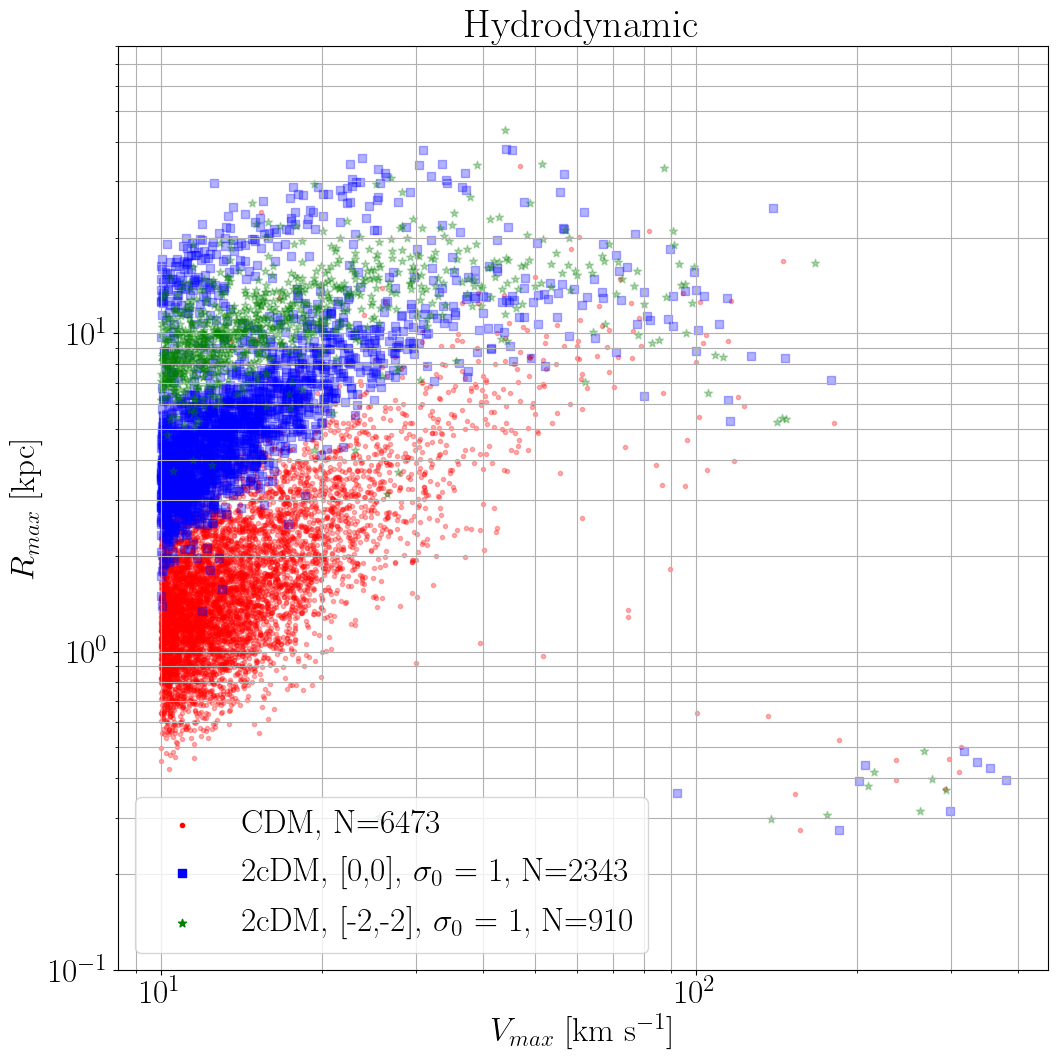

In [17]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

N_CDM = N_tcDM1 = N_tcDM2 = 0

for r in CDM_runs:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_CDM += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='.', color='r', alpha=ALPHA)

for r in tcDM_runs1:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_tcDM1 += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='s', color='b', alpha=ALPHA)

for r in tcDM_runs2:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_tcDM2 += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='*', color='g', alpha=ALPHA)

ax.scatter([],[], marker='.', label=f'CDM, N={N_CDM}', color='r')
ax.scatter([],[], marker='s', label=f'2cDM, [0,0], $\sigma_0$ = 1, N={N_tcDM1}', color='b')
ax.scatter([],[], marker='*', label=f'2cDM, [-2,-2], $\sigma_0$ = 1, N={N_tcDM2}', color='g')

ax.set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax.set_ylabel("$R_{max}$ [kpc]")
ax.set_ylim(10**-1, 8*10**1)
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both", ls="-")

ax.legend()
plt.title('Hydrodynamic')
plt.savefig(outpath + f'z_{run.redshifts[snap_no]:.2f}_Vmax-Rmax_HY.pdf', dpi=DPI)
plt.show()

In [18]:
outpath = '../../plots/plots_L3N256_variation/'

CDM_runs = [ f'run_CDM_L3N256_DM_dir_{i}' for i in range(10) ] + ['run_CDM_L3N256_DM']

tcDM_runs1 = [ f'run_2cDM_L3N256_DM_power00_sigma1_dir_{i}' for i in range(10) ] + ['run_2cDM_L3N256_DM_power00_sigma1']

tcDM_runs2 = [ f'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_{i}' for i in range(10) ] + ['run_2cDM_L3N256_DM_powerm2m2_sigma1']


<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3927984/4100773805.py:39: SyntaxWarning: invalid escape sequence '\s'
  ax.scatter([],[], marker='s', label=f'2cDM, [0,0], $\sigma_0$ = 1, N={N_tcDM1}', color='b')
/tmp/ipykernel_3927984/4100773805.py:40: SyntaxWarning: invalid escape sequence '\s'
  ax.scatter([],[], marker='*', label=f'2cDM, [-2,-2], $\sigma_0$ = 1, N={N_tcDM2}', color='g')


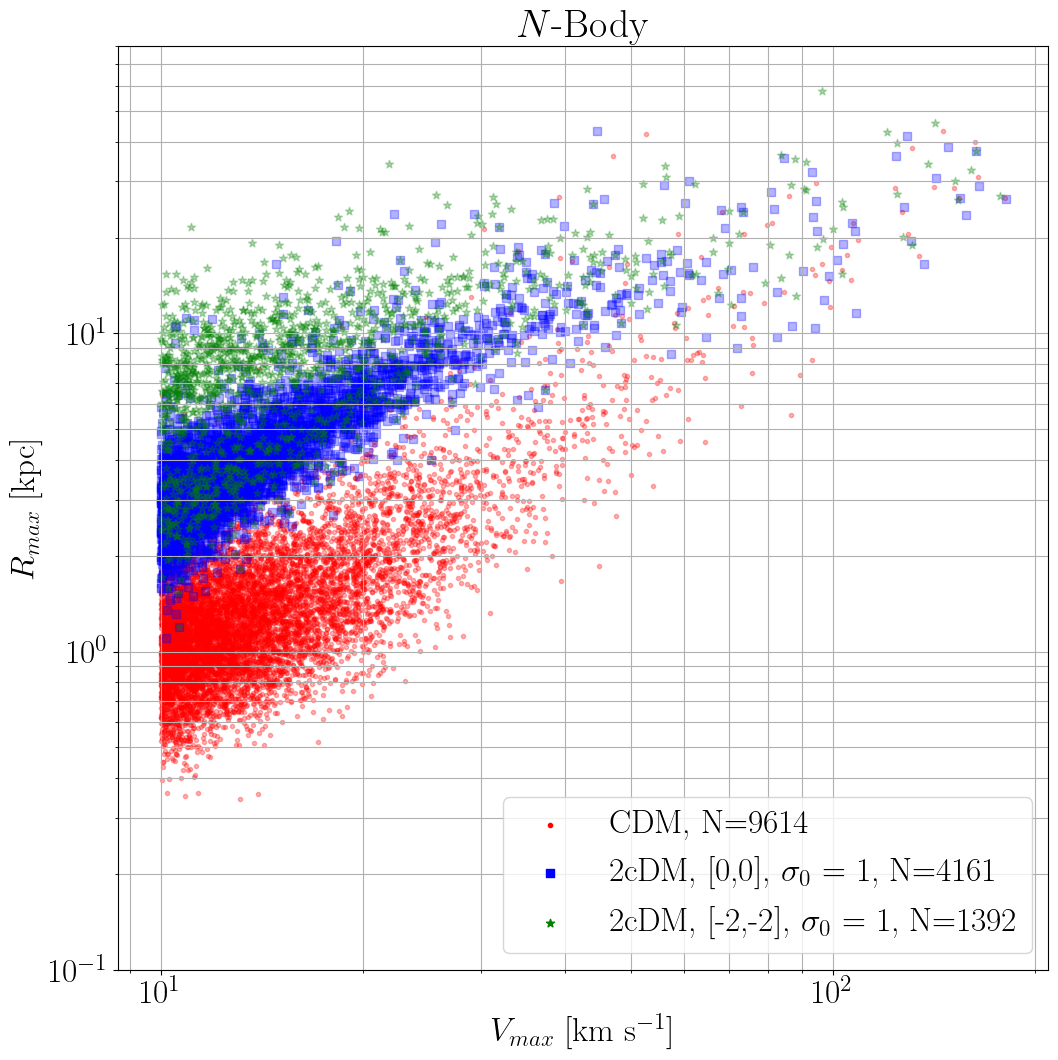

In [19]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

N_CDM = N_tcDM1 = N_tcDM2 = 0

for r in CDM_runs:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_CDM += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='.', color='r', alpha=ALPHA)

for r in tcDM_runs1:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_tcDM1 += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='s', color='b', alpha=ALPHA)

for r in tcDM_runs2:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    N_tcDM2 += allowed.sum()

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='*', color='g', alpha=ALPHA)

ax.scatter([],[], marker='.', label=f'CDM, N={N_CDM}', color='r')
ax.scatter([],[], marker='s', label=f'2cDM, [0,0], $\sigma_0$ = 1, N={N_tcDM1}', color='b')
ax.scatter([],[], marker='*', label=f'2cDM, [-2,-2], $\sigma_0$ = 1, N={N_tcDM2}', color='g')

ax.set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax.set_ylabel("$R_{max}$ [kpc]")
ax.set_ylim(10**-1, 8*10**1)
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both", ls="-")

ax.legend()
plt.title('$N$-Body')
plt.savefig(outpath + f'z_{run.redshifts[snap_no]:.2f}_Vmax-Rmax_DM.pdf', dpi=DPI)
plt.show()